This notebook shows all inputs needed for the calculation of the EBL,
and how to calculate the outputs.

Inputs for the EBL caused by the stellar population:
- Stellar synthetic spectra
- Stellar formation rate
- Metallicity evolution
- Dust absorption model
- Dust reemission template (and possible parameters associated with the template)

Inputs for the EBL caused by the intrahalo light (Stars expelled from their galaxies):
- A_ihl
- alpha

# Imports

In [1]:
# Check that the working directory is correct for the paths
import os

if os.path.basename(os.getcwd()) == 'scripts' or os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir("..")

# If the directory for outputs is not present, create it.
if not os.path.exists("outputs/"):
    os.makedirs("outputs/")

In [2]:
import yaml
import psutil
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import c
from scipy.interpolate import UnivariateSpline, RegularGridInterpolator

from niebla import ebl_model, measurements

# If we want to compare our results to previous calculations of the EBL, we load ebltable
# from https://github.com/me-manu/ebltable
from ebltable.ebl_from_model import EBL

Module hmf not loaded


### Some matplotlib values that I like for my graphs
Please feel free to change these (but I think they are cool)

In [3]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.labelsize'] = 20
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('figure', titlesize=17)
plt.rc('xtick', top=True, direction='in')
plt.rc('ytick', right=True, direction='in')
plt.rc('xtick.major', size=7, width=1.5, top=True)
plt.rc('ytick.major', size=7, width=1.5, right=True)
plt.rc('xtick.minor', size=4, width=1)
plt.rc('ytick.minor', size=4, width=1)

In [4]:
# Some arrays to distinguish different models in the next plots
models = ['solid', 'dashed', 'dotted', 'dashdot']
colors = ['b', 'r', 'g', 'orange', 'grey', 'purple', 'k', 'cyan', 'brown']

linstyles_ssp = ['solid', '--', 'dotted', '-.']

markers = ['.', 'x', '+', '*', '^', '>', '<']
color_ssp = ['b', 'orange', 'k', 'r', 'green', 'grey', 'limegreen', 'purple', 'brown']

# Configuration file reading and data input/output

In [5]:
# Configuration file reading and data input/output
def read_config_file(ConfigFile):
    with open(ConfigFile, 'r') as stream:
        try:
            parsed_yaml = yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            print(exc)
    return parsed_yaml

# We initialize the class with the input file
config_data = read_config_file('notebooks/input_example.yml')
ebl_class = ebl_model.EBL_model.input_yaml_data_into_class(config_data, log_prints=True)

2025-09-01 18:09:15 - INFO - 0.02s: Initialize class: end


# OUTPUTS OF THE CODE: EMISSIVITIES, EBL INTENSITIES

## FIGURE: EMISSIVITIES FOR DIFFERENT MODELS

Here we show how to calculate the emissivities from the inputs we have previously shown. We have data points that depend on wavelength and redshift, so we create an spline that takes both of these parameters.


Snippet of the necessary lines of code to calculate the emissivities:

```
ebl_class = EBL_model.input_yaml_data_into_class(config_data, log_prints=True)
ebl_class.emiss_ssp_calculation(config_data['ssp_models'][NAME_OF_MODEL])
```

And can be used afterwards with an spline:

```
ebl_class.emiss_ssp_spline(freq_array_ebl, zz)
```

2025-09-01 18:09:16 - INFO - 0.59s: SSP parameters: Stripped Goetberg19



SSP model:  Stripped Goetberg19


2025-09-01 18:09:16 - INFO - 0.65s: Reading of SSP file
2025-09-01 18:09:16 - INFO - 0.01s: SSP emissivity: set time integration cube
2025-09-01 18:09:16 - INFO - 0.00s: Dust reem: mean metall calculation
2025-09-01 18:09:20 - INFO - 4.06s: SSP emissivity: set the initial kernel
2025-09-01 18:09:20 - INFO - 0.03s: SSP emissivity: set dust absorption
2025-09-01 18:09:21 - INFO - 0.02s: SSP emissivity: calculate ssp kernel
2025-09-01 18:09:21 - INFO - 0.12s: SSP emissivity: integrate emissivity
2025-09-01 18:09:21 - INFO - 0.00s: SSP emissivity: end


   -> Default parameters for lambda_steps_fn22 chosen:  [0.15, 0.167, 0.218, 0.422, 2.0]


2025-09-01 18:09:21 - INFO - 0.14s: SSP parameters: Example SB99 and Chary



SSP model:  Example SB99 and Chary


2025-09-01 18:09:22 - INFO - 0.99s: Reading of SSP file
2025-09-01 18:09:22 - INFO - 0.01s: SSP emissivity: set time integration cube
2025-09-01 18:09:25 - INFO - 3.60s: SSP emissivity: set the initial kernel
2025-09-01 18:09:25 - INFO - 0.03s: SSP emissivity: set dust absorption
2025-09-01 18:09:25 - INFO - 0.00s: Dust reem: enter


   -> Default parameters for lambda_steps_fn22 chosen:  [0.15, 0.167, 0.218, 0.422, 2.0]


2025-09-01 18:09:29 - INFO - 3.60s: Dust reem: lumin_abs calc
2025-09-01 18:09:29 - INFO - 0.10s: Dust reem: integration of Lssp
2025-09-01 18:09:29 - INFO - 0.00s: Dust reem: dust spline creation
2025-09-01 18:09:33 - INFO - 3.53s: Dust reem: sum to kernel_emiss
2025-09-01 18:09:33 - INFO - 0.02s: SSP emissivity: calculate ssp kernel
2025-09-01 18:09:33 - INFO - 0.10s: SSP emissivity: integrate emissivity
2025-09-01 18:09:33 - INFO - 0.00s: SSP emissivity: end
2025-09-01 18:09:33 - INFO - 0.13s: SSP parameters: Example SB99 with Bosa



SSP model:  Example SB99 with Bosa


2025-09-01 18:09:36 - INFO - 3.58s: SSP emissivity: set the initial kernel
2025-09-01 18:09:36 - INFO - 0.03s: SSP emissivity: set dust absorption
2025-09-01 18:09:36 - INFO - 0.00s: Dust reem: enter


   -> Default parameters for lambda_steps_fn22 chosen:  [0.15, 0.167, 0.218, 0.422, 2.0]


2025-09-01 18:09:40 - INFO - 3.61s: Dust reem: lumin_abs calc
2025-09-01 18:09:40 - INFO - 0.08s: Dust reem: integration of Lssp
2025-09-01 18:09:40 - INFO - 0.00s: Dust reem: dust spline creation
2025-09-01 18:09:44 - INFO - 3.64s: Dust reem: sum to kernel_emiss
2025-09-01 18:09:44 - INFO - 0.02s: SSP emissivity: calculate ssp kernel
2025-09-01 18:09:44 - INFO - 0.10s: SSP emissivity: integrate emissivity
2025-09-01 18:09:44 - INFO - 0.00s: SSP emissivity: end
2025-09-01 18:09:44 - INFO - 0.13s: SSP parameters: Custom example
2025-09-01 18:09:44 - INFO - 0.00s: Reading of SSP file
2025-09-01 18:09:44 - INFO - 0.00s: SSP emissivity: set time integration cube



SSP model:  Custom example


2025-09-01 18:09:48 - INFO - 3.95s: SSP emissivity: set the initial kernel
2025-09-01 18:09:48 - INFO - 0.03s: SSP emissivity: set dust absorption
2025-09-01 18:09:48 - INFO - 0.00s: Dust reem: enter


   -> Default parameters for lambda_steps_fn22 chosen:  [0.15, 0.167, 0.218, 0.422, 2.0]


2025-09-01 18:09:52 - INFO - 3.73s: Dust reem: lumin_abs calc
2025-09-01 18:09:52 - INFO - 0.08s: Dust reem: integration of Lssp
2025-09-01 18:09:52 - INFO - 0.00s: Dust reem: dust spline creation
2025-09-01 18:09:56 - INFO - 3.83s: Dust reem: sum to kernel_emiss
2025-09-01 18:09:56 - INFO - 0.02s: SSP emissivity: calculate ssp kernel
2025-09-01 18:09:56 - INFO - 0.10s: SSP emissivity: integrate emissivity
2025-09-01 18:09:56 - INFO - 0.00s: SSP emissivity: end


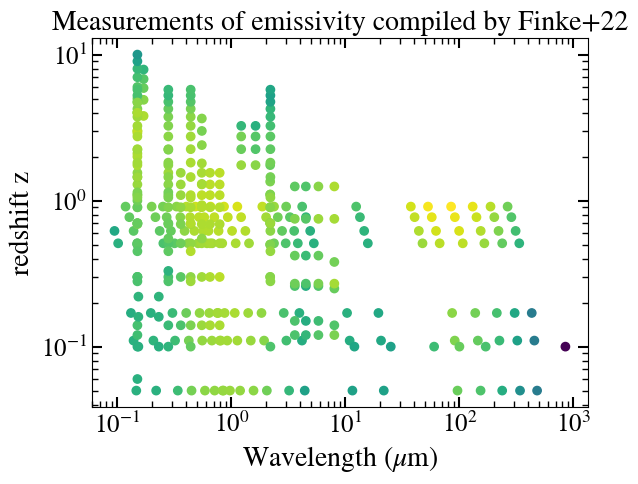

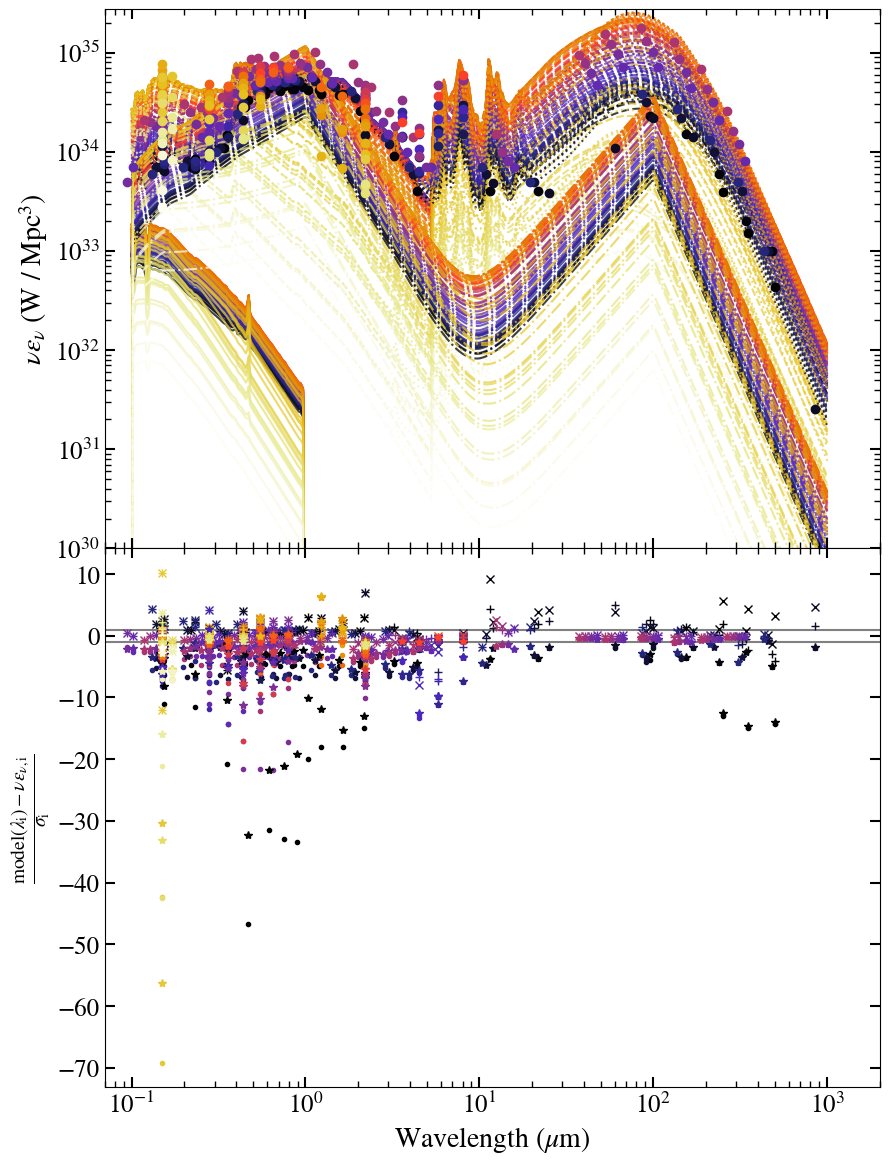

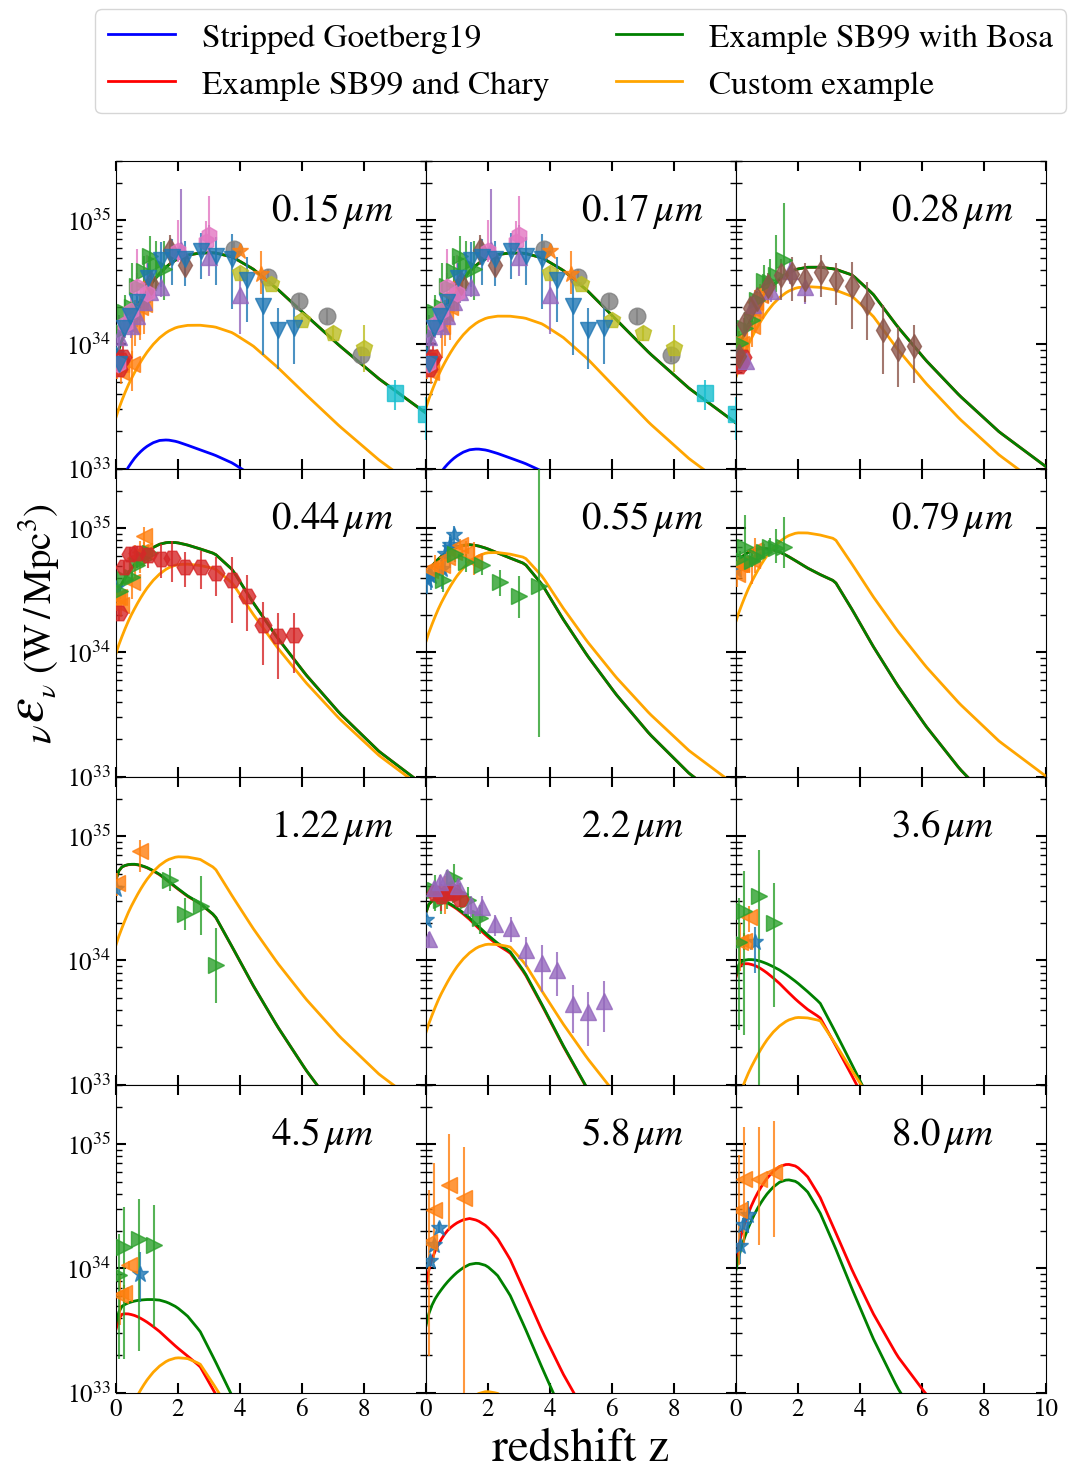

In [6]:
plt.figure()

plt.title('Measurements of emissivity compiled by Finke+22')

waves_ebl = np.logspace(-1, 3, num=500)
freq_array_ebl = c.value / (waves_ebl * 1e-6)

emiss_data = measurements.emissivity(
    z_min=None, z_max=None,
    lambda_min=0., lambda_max=3e3,
    take_only_refs=None, plot=False)

plt.scatter(x=emiss_data['lambda'], y=emiss_data['z'],
            c=np.log10(emiss_data['eje']),
            cmap='viridis')

plt.xscale('log')
plt.yscale('log')

plt.ylabel(r'redshift z')
plt.xlabel(r'Wavelength ($\mu$m)')

# ---------------------------------------------------------------------------

fig_emiss_lambda, (ax_emiss_lambda0, ax_emiss_lambda1) = plt.subplots(
    2, 1, figsize=(10, 14))
plt.subplots_adjust(wspace=0, hspace=0)

plt.subplot(211)
for nz, zz in enumerate(np.unique(emiss_data['z'])):
    ax_emiss_lambda0.scatter(
        x=emiss_data['lambda'][emiss_data['z'] == zz],
        y=emiss_data['eje'][emiss_data['z'] == zz],
        color=plt.cm.CMRmap(nz / float(len(np.unique(emiss_data['z'])))),
                )

plt.xscale('log')
plt.yscale('log')

plt.xlim(0.07, 2e3)
plt.ylim(bottom=1e30)

plt.ylabel(r'$\nu \varepsilon_{\nu}$ (W / Mpc$^3$)')

plt.subplot(212)

plt.xscale('log')
plt.xlim(0.07, 2e3)

plt.axhline(1, c='grey', zorder=0)
plt.axhline(-1, c='grey', zorder=0)

plt.xlabel(r'Wavelength ($\mu$m)')
plt.ylabel(
    r'$\frac{\mathrm{model}(\lambda_\mathrm{i})- \nu \varepsilon_{\nu,'
    r'\mathrm{i}}}'
    r'{\sigma_\mathrm{i}}$')

# ---------------------------------------------------------------------------
fig_emiss_z, axes_emiss_z = plt.subplots(4, 3, figsize=(12, 16))

plt.subplots_adjust(wspace=0, hspace=0)
z_array = np.linspace(1e-9, 10., num=100)

for n_lambda, ll in enumerate([0.15, 0.17, 0.28,
                               0.44, 0.55, 0.79,
                               1.22, 2.2, 3.6,
                               4.5, 5.8, 8.0]):
    ax = plt.subplot(4, 3, n_lambda + 1)
    measurements.emissivity(
        z_min=None, z_max=None,
        lambda_min=ll - 0.05, lambda_max=ll + 0.05,
        plot=True, ax=ax)

    # if n_lambda != 8:
    plt.annotate(r'%r$\,\mu m$' % ll, xy=(5, 1e35), fontsize=28)

    plt.xlim(min(z_array), max(z_array))
    plt.ylim(1e33, 3e35)

    plt.yscale('log')

handles_emiss, labels_emiss = [], []

plt.subplot(4, 3, 11)
plt.xlabel(r'redshift z', fontsize=34)

plt.subplot(4, 3, 4)
plt.ylabel(r'$_{\nu} \varepsilon_{_{\nu} \,\,(\mathrm{W\, / \, Mpc}^3)}$',
           fontsize=40)

ax = [plt.subplot(4, 3, i) for i in [2, 3, 5, 6, 8, 9, 11, 12]]
for a in ax:
    a.set_yticklabels([])

ax = [plt.subplot(4, 3, i + 1) for i in range(9)]
for a in ax:
    a.set_xticklabels([])

ax = [plt.subplot(4, 3, i + 1) for i in range(9, 12)]
for a in ax:
    a.set_xticks([0, 2, 4, 6, 8])

ax = [plt.subplot(4, 3, i) for i in range(1, 10)]
for a in ax:
    a.set_xticks([0, 2, 4, 6, 8, 10])

a = plt.subplot(4, 3, 12)
a.set_xticks([0, 2, 4, 6, 8, 10])


# SSPs component calculation (all models listed in the input file)
for nkey, key in enumerate(config_data['ssp_models']):
    print()
    print('SSP model: ', config_data['ssp_models'][key]['name'])

    ebl_class.emiss_ssp_calculation(config_data['ssp_models'][key])

    plt.figure(fig_emiss_lambda)
    for nz, zz in enumerate(np.unique(emiss_data['z'])):
        plt.subplot(211)
        
        ax_emiss_lambda0.plot(
            waves_ebl, 
            ebl_class.emiss_ssp_spline(waves_ebl, zz) * freq_array_ebl * 1e-7,
            color=plt.cm.CMRmap(nz / float(len(np.unique(emiss_data['z'])))),
            zorder=0, alpha=0.75, ls=linstyles_ssp[nkey])
        freq_arr_emiss = (3e8*1e6/emiss_data['lambda'][emiss_data['z'] == zz])

        plt.subplot(212)
        plt.plot(
            emiss_data['lambda'][emiss_data['z'] == zz],
            (ebl_class.emiss_ssp_spline(
                emiss_data['lambda'][emiss_data['z'] == zz], zz)
               * freq_arr_emiss * 1e-7
               - emiss_data['eje'][emiss_data['z'] == zz])
              / ((emiss_data['eje_n'][emiss_data['z'] == zz]
                  + emiss_data['eje_p'][emiss_data['z'] == zz]) / 2.),
                    color=plt.cm.CMRmap(
                        nz / float(len(np.unique(emiss_data['z'])))),
            ls='', marker=markers[nkey]
                    )

    plt.figure(fig_emiss_z)
    for n_lambda, ll in enumerate([0.15, 0.17, 0.28,
                                   0.44, 0.55, 0.79,
                                   1.22, 2.2, 3.6,
                                   4.5, 5.8, 8.0]):
        plt.subplot(4, 3, n_lambda + 1)

        plt.plot(z_array,
                 (c.value / (ll * 1e-6))
                 * ebl_class.emiss_ssp_spline(
                     ll * np.ones(len(z_array)), z_array)
                 * 1e-7,
                 linestyle='-',  # marker=markers[nkey],
                 color=colors[nkey % len(colors)], lw=2)

    labels_emiss.append(
        config_data['ssp_models'][key]['name'])
    handles_emiss.append(plt.Line2D([], [], linewidth=2,
                                    linestyle='-',
                                    color=colors[nkey % len(colors)]))

plt.figure(fig_emiss_z)
plt.subplot(4, 3, 2)
plt.legend(handles_emiss, labels_emiss,
           loc=8, fontsize=24, bbox_to_anchor=(0.5, 1.1),
           ncol=2)

## FIGURE: EBL FOR DIFFERENT MODELS

Here we show how to calculate the EBL from the inputs we have previously shown. The only requisite to calculate the EBL is to have initialized the EBL_model class with a yaml file.

Above this cell we have displayed various commands to show the inputs of the code, but none of these calculations are necessary to calculate the EBL. Moreover, calculating the EBL will initialize the SSP spectra and calculate the emissivities, so using only this command the other values will be calculated and saved in memory. This is preferred since it will save time and computing power.

Snippet of the necessary lines of code to calculate the EBL:
```
ebl_class = EBL_model.input_yaml_data_into_class(config_data, log_prints=True)
ebl_class.ebl_ssp_calculation(config_data['ssp_models'][NAME_OF_MODEL])
```

And can be used afterwards with an spline:

```
ebl_class.ebl_ssp_spline(wavelength, zz)
```

## Writing the EBL models to txt files
Creates a file containing the values for wavelength, redshift and EBL values, 
of dimensions (n+1) x (m+1). This file is compatible with the package ebltable, serving as an input to calculate optical depths.

We show this funtion in line 16 of the next cell.

The zeroth column contains the n wavelength values in mu meters.

The first row contains the m redshift values.

The remaining values (n x m) are the EBL photon density values in nW / m$^2$ sr.

The entry [0,0] is empty.

2025-09-01 18:10:01 - INFO - 5.04s: SSP parameters: Stripped Goetberg19



SSP model:  Stripped Goetberg19


2025-09-01 18:10:02 - INFO - 0.60s: Reading of SSP file
2025-09-01 18:10:02 - INFO - 0.01s: SSP emissivity: set time integration cube
2025-09-01 18:10:06 - INFO - 4.14s: SSP emissivity: set the initial kernel
2025-09-01 18:10:06 - INFO - 0.03s: SSP emissivity: set dust absorption
2025-09-01 18:10:06 - INFO - 0.02s: SSP emissivity: calculate ssp kernel
2025-09-01 18:10:06 - INFO - 0.10s: SSP emissivity: integrate emissivity
2025-09-01 18:10:06 - INFO - 0.00s: SSP emissivity: end


   -> Default parameters for lambda_steps_fn22 chosen:  [0.15, 0.167, 0.218, 0.422, 2.0]


2025-09-01 18:10:06 - INFO - 0.05s: Initialize cubes: calculation of division
2025-09-01 18:10:06 - INFO - 0.02s: Initialize cubes: calculation of kernel
2025-09-01 18:10:06 - INFO - 0.00s: SSP EBL: calculation of z cube
2025-09-01 18:10:07 - INFO - 1.25s: SSP EBL: calculation of kernel interpolation
2025-09-01 18:10:07 - INFO - 0.10s: SSP EBL: integration
2025-09-01 18:10:07 - INFO - 0.00s: SSP EBL: done
2025-09-01 18:10:07 - INFO - 0.07s: SSP parameters: Example SB99 and Chary



SSP model:  Example SB99 and Chary


2025-09-01 18:10:08 - INFO - 0.99s: Reading of SSP file
2025-09-01 18:10:08 - INFO - 0.00s: SSP emissivity: set time integration cube
2025-09-01 18:10:13 - INFO - 4.56s: SSP emissivity: set the initial kernel
2025-09-01 18:10:13 - INFO - 0.04s: SSP emissivity: set dust absorption
2025-09-01 18:10:13 - INFO - 0.00s: Dust reem: enter


   -> Default parameters for lambda_steps_fn22 chosen:  [0.15, 0.167, 0.218, 0.422, 2.0]


2025-09-01 18:10:17 - INFO - 4.47s: Dust reem: lumin_abs calc
2025-09-01 18:10:17 - INFO - 0.11s: Dust reem: integration of Lssp
2025-09-01 18:10:17 - INFO - 0.00s: Dust reem: dust spline creation
2025-09-01 18:10:21 - INFO - 3.90s: Dust reem: sum to kernel_emiss
2025-09-01 18:10:21 - INFO - 0.03s: SSP emissivity: calculate ssp kernel
2025-09-01 18:10:22 - INFO - 0.10s: SSP emissivity: integrate emissivity
2025-09-01 18:10:22 - INFO - 0.00s: SSP emissivity: end
2025-09-01 18:10:22 - INFO - 0.04s: Initialize cubes: calculation of division
2025-09-01 18:10:22 - INFO - 0.02s: Initialize cubes: calculation of kernel
2025-09-01 18:10:22 - INFO - 0.00s: SSP EBL: calculation of z cube
2025-09-01 18:10:23 - INFO - 1.14s: SSP EBL: calculation of kernel interpolation
2025-09-01 18:10:23 - INFO - 0.15s: SSP EBL: integration
2025-09-01 18:10:23 - INFO - 0.00s: SSP EBL: done
2025-09-01 18:10:23 - INFO - 0.08s: SSP parameters: Example SB99 with Bosa



SSP model:  Example SB99 with Bosa


2025-09-01 18:10:27 - INFO - 3.82s: SSP emissivity: set the initial kernel
2025-09-01 18:10:27 - INFO - 0.03s: SSP emissivity: set dust absorption
2025-09-01 18:10:27 - INFO - 0.00s: Dust reem: enter


   -> Default parameters for lambda_steps_fn22 chosen:  [0.15, 0.167, 0.218, 0.422, 2.0]


2025-09-01 18:10:31 - INFO - 4.01s: Dust reem: lumin_abs calc
2025-09-01 18:10:31 - INFO - 0.07s: Dust reem: integration of Lssp
2025-09-01 18:10:31 - INFO - 0.00s: Dust reem: dust spline creation
2025-09-01 18:10:35 - INFO - 3.82s: Dust reem: sum to kernel_emiss
2025-09-01 18:10:35 - INFO - 0.03s: SSP emissivity: calculate ssp kernel
2025-09-01 18:10:35 - INFO - 0.14s: SSP emissivity: integrate emissivity
2025-09-01 18:10:35 - INFO - 0.00s: SSP emissivity: end
2025-09-01 18:10:35 - INFO - 0.05s: Initialize cubes: calculation of division
2025-09-01 18:10:35 - INFO - 0.02s: Initialize cubes: calculation of kernel
2025-09-01 18:10:35 - INFO - 0.00s: SSP EBL: calculation of z cube
2025-09-01 18:10:36 - INFO - 1.26s: SSP EBL: calculation of kernel interpolation
2025-09-01 18:10:36 - INFO - 0.13s: SSP EBL: integration
2025-09-01 18:10:36 - INFO - 0.00s: SSP EBL: done
2025-09-01 18:10:36 - INFO - 0.08s: SSP parameters: Custom example
2025-09-01 18:10:36 - INFO - 0.00s: Reading of SSP file
20


SSP model:  Custom example


2025-09-01 18:10:40 - INFO - 3.65s: SSP emissivity: set the initial kernel
2025-09-01 18:10:40 - INFO - 0.04s: SSP emissivity: set dust absorption
2025-09-01 18:10:40 - INFO - 0.00s: Dust reem: enter


   -> Default parameters for lambda_steps_fn22 chosen:  [0.15, 0.167, 0.218, 0.422, 2.0]


2025-09-01 18:10:44 - INFO - 3.60s: Dust reem: lumin_abs calc
2025-09-01 18:10:44 - INFO - 0.10s: Dust reem: integration of Lssp
2025-09-01 18:10:44 - INFO - 0.00s: Dust reem: dust spline creation
2025-09-01 18:10:47 - INFO - 3.47s: Dust reem: sum to kernel_emiss
2025-09-01 18:10:47 - INFO - 0.03s: SSP emissivity: calculate ssp kernel
2025-09-01 18:10:47 - INFO - 0.12s: SSP emissivity: integrate emissivity
2025-09-01 18:10:47 - INFO - 0.00s: SSP emissivity: end
2025-09-01 18:10:48 - INFO - 0.05s: Initialize cubes: calculation of division
2025-09-01 18:10:48 - INFO - 0.02s: Initialize cubes: calculation of kernel
2025-09-01 18:10:48 - INFO - 0.00s: SSP EBL: calculation of z cube
2025-09-01 18:10:49 - INFO - 1.13s: SSP EBL: calculation of kernel interpolation
2025-09-01 18:10:49 - INFO - 0.11s: SSP EBL: integration
2025-09-01 18:10:49 - INFO - 0.00s: SSP EBL: done
/home/porrassa/Desktop/EBL_ModelCode/niebla/venv/lib/python3.12/site-packages/ebltable/interpolate.py:278: RuntimeWarning: Wa

(0.01, 100)

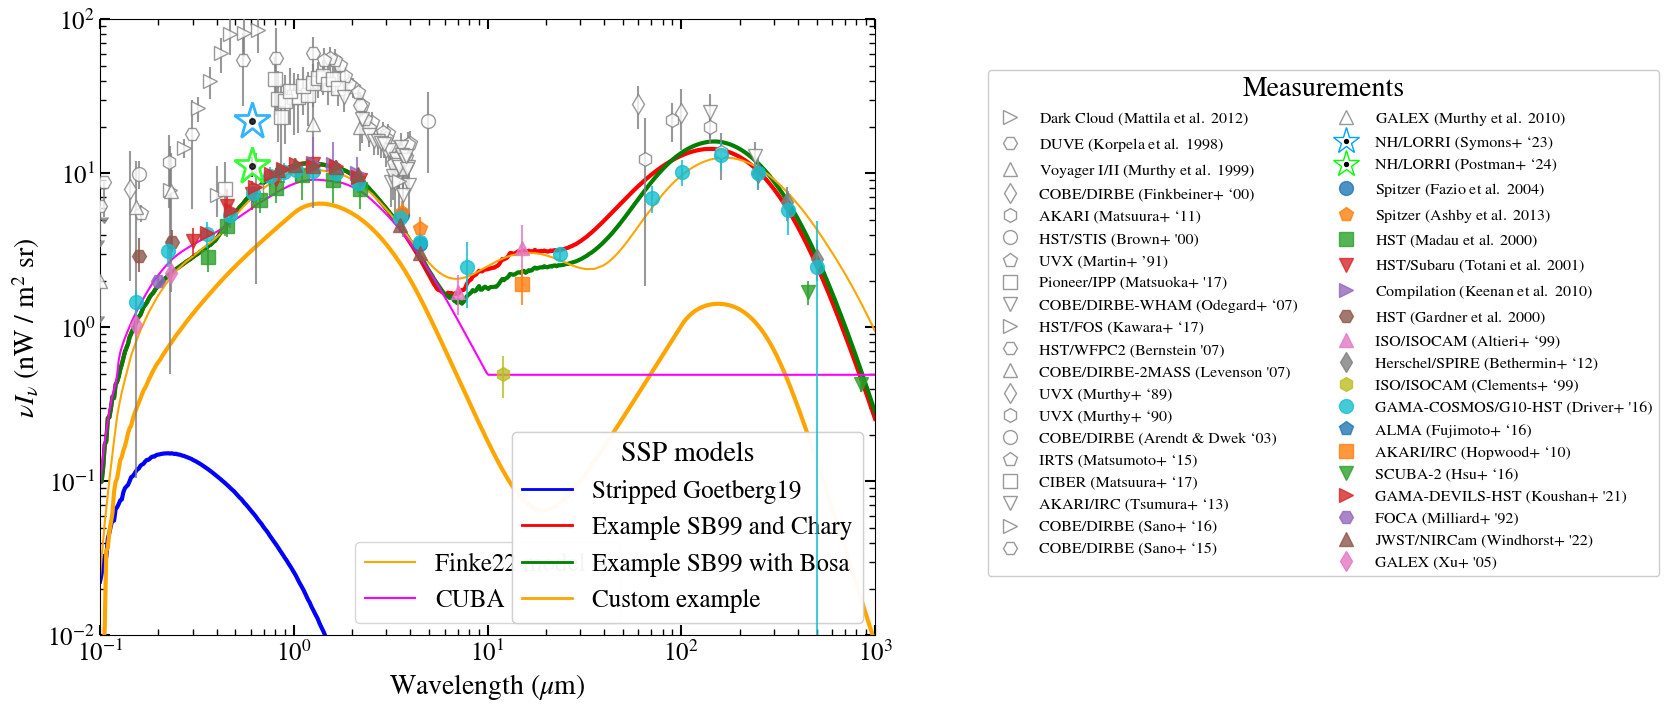

In [7]:
fig_cob, ax_cob = plt.subplots(figsize=(10, 8))

measurements.ebl(
    lambda_min_total=0.08, fig=fig_cob, ax=ax_cob,
    colors_UL=['grey'], plot_UL=True, plot_IGL=True,
    show_legend=True)

waves_ebl = np.logspace(-1, 3, num=500)
freq_array_ebl = np.log10(3e8 / (waves_ebl * 1e-6))

for nkey, key in enumerate(config_data['ssp_models']):
    print()
    print('SSP model: ', config_data['ssp_models'][key]['name'])

    ebl_class.ebl_ssp_calculation(config_data['ssp_models'][key])
    ebl_class.write_ebl_to_ascii(output_path='outputs/', name=key)

    ax_cob.plot(waves_ebl, ebl_class.ebl_ssp_spline(
        waves_ebl, 0.),
                linestyle='-', color=colors[nkey % len(colors)],
                lw=3,
                )

# We introduce the Finke22 and CUBA splines from ebltable
ebl = {}
for m in EBL.get_models():
    ebl[m] = EBL.readmodel(m)
nuInu = {}
for m, e in ebl.items():
    nuInu[m] = e.ebl_array(np.array([0.]), waves_ebl)
spline_finke = UnivariateSpline(waves_ebl, nuInu['finke2022'], s=0, k=1)
spline_cuba = UnivariateSpline(waves_ebl, nuInu['cuba'], s=0, k=1)
ax_cob.plot(waves_ebl, spline_finke(waves_ebl),
            c='orange', label='Finke22 model A')
ax_cob.plot(waves_ebl, spline_cuba(waves_ebl),
            c='fuchsia', label='CUBA')

plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'Wavelength ($\mu$m)')
plt.ylabel(r'$\nu I_{\nu}$ (nW / m$^2$ sr)')

legend22 = plt.legend()
legend33 = ax_cob.legend([plt.Line2D([], [], linewidth=2, linestyle='-',
                                     color=colors[i])
                          for i in range(len(config_data['ssp_models']))],
                         [config_data['ssp_models'][key]['name']
                          for key in config_data['ssp_models']],
                         title=r'SSP models',  # bbox_to_anchor=(1.04, 0.1),
                         loc=4
                         )

ax_cob.add_artist(legend22)
ax_cob.add_artist(legend33)

plt.xlim([.1, 1000])
plt.ylim(1e-2, 100)

## FIGURE: EBL WITH MANY CUSTOM INPUTS

2025-09-01 18:10:51 - INFO - 1.74s: SSP parameters: Example custom
2025-09-01 18:10:51 - INFO - 0.00s: Dust reem: mean metall calculation
2025-09-01 18:10:54 - INFO - 3.42s: SSP emissivity: set the initial kernel
2025-09-01 18:10:54 - INFO - 0.03s: SSP emissivity: set dust absorption
2025-09-01 18:10:54 - INFO - 0.00s: Dust reem: enter
2025-09-01 18:10:58 - INFO - 3.77s: Dust reem: lumin_abs calc
2025-09-01 18:10:58 - INFO - 0.11s: Dust reem: integration of Lssp
2025-09-01 18:10:58 - INFO - 0.00s: Dust reem: dust spline creation
2025-09-01 18:11:02 - INFO - 3.88s: Dust reem: sum to kernel_emiss
2025-09-01 18:11:02 - INFO - 0.02s: SSP emissivity: calculate ssp kernel
2025-09-01 18:11:02 - INFO - 0.14s: SSP emissivity: integrate emissivity
2025-09-01 18:11:02 - INFO - 0.00s: SSP emissivity: end
2025-09-01 18:11:02 - INFO - 0.05s: Initialize cubes: calculation of division
2025-09-01 18:11:02 - INFO - 0.03s: Initialize cubes: calculation of kernel
2025-09-01 18:11:02 - INFO - 0.00s: SSP EB

(0.01, 120)

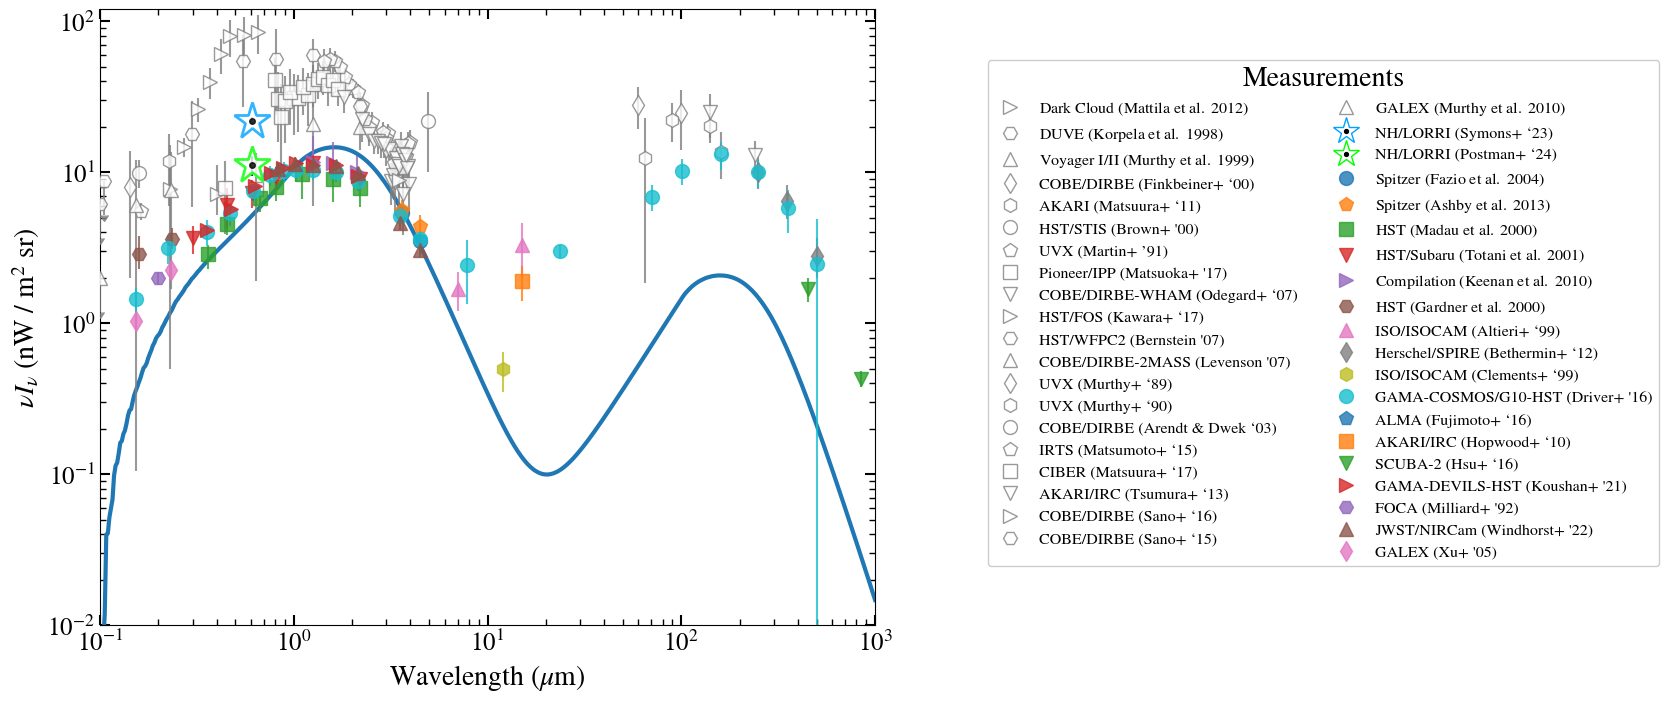

In [8]:
fig_cob, ax_cob = plt.subplots(figsize=(10, 8))

def metall_funct_custom(zz, params):
    return params[0] * zz**params[1]

def custom_dust_abs(wv, zz):
    return (0.1 * zz + wv) * (wv > 0.1)

dict_inputs = {
    'dust_abs_models': custom_dust_abs,
    'dust_abs_params': None,
    'dust_reem': True,
    'dust_reem_parametrization': {'library': 'notebooks/minimal_example/dust_reem_minimal/'},
    'metall_formula': metall_funct_custom,
    'metall_params': [0.003, -0.2],
    'name': 'Example custom',
    'sfr_formula': 'ci[0]*(1 + zz)**ci[1] / (1 + ((1 + zz) / ci[2]) ** ci[3])',
    'sfr_params': [ 0.02, 2.7, 2.9, 5.6],
    'ssp': {
      'ssp_type': 'generic',
      'path_ssp': 'notebooks/minimal_example/ssp_minimal/',
      'ignore_rows': 0,
      'total_stellar_mass': 0,  # (dex)
      'L_lambda': False}}


measurements.ebl(
    lambda_min_total=0.08, fig=fig_cob, ax=ax_cob,
    colors_UL=['grey'], plot_UL=True, plot_IGL=True,
    show_legend=True)

waves_ebl = np.logspace(-1, 3, num=500)
freq_array_ebl = np.log10(3e8 / (waves_ebl * 1e-6))

ebl_class.ebl_ssp_calculation(dict_inputs)

ax_cob.plot(waves_ebl, ebl_class.ebl_ssp_spline(waves_ebl, 0.),
            linestyle='-', lw=3)



plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'Wavelength ($\mu$m)')
plt.ylabel(r'$\nu I_{\nu}$ (nW / m$^2$ sr)')

plt.xlim([.1, 1000])
plt.ylim(bottom=1e-2, top=120)